In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles,Heatmap, LayersControl
from random import uniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [5]:
cd ..

/Users/alphonsowoodbury/DS/Projects/aw_flatiron_group_projects/Module3_Project


In [169]:
df = pd.read_csv('cleaned_water.csv',index_col=0)

In [170]:
df = df[df['longitude'] > 32.5 ]

df.head().T

,0,2,3,5,6
id,69572,34310,67743,9944,19816
status_group,functional,functional,non functional,functional,non functional
amount_tsh,6000,25,0,20,0
funder,Roman,Lottery Club,Unicef,Mkinga Distric Coun,Dwsp
gps_height,1390,686,263,0,0
installer,Roman,World vision,UNICEF,DWE,DWSP
longitude,34.9381,37.4607,38.4862,39.1728,33.3624
latitude,-9.85632,-3.82133,-11.1553,-4.76559,-3.76636
basin,Lake Nyasa,Pangani,Ruvuma / Southern Coast,Pangani,Internal
region,Iringa,Manyara,Mtwara,Tanga,Shinyanga


---

## Target

Status Group

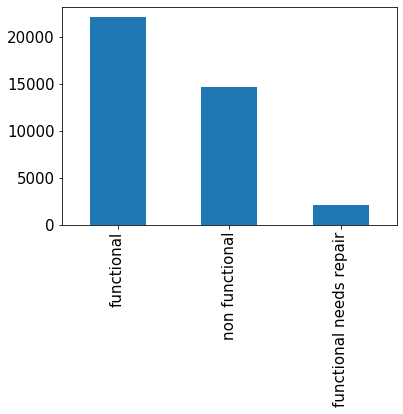

In [171]:
df.status_group.value_counts().plot(kind='bar',fontsize=15) #can this be a boxplot? #this is unbalanced

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


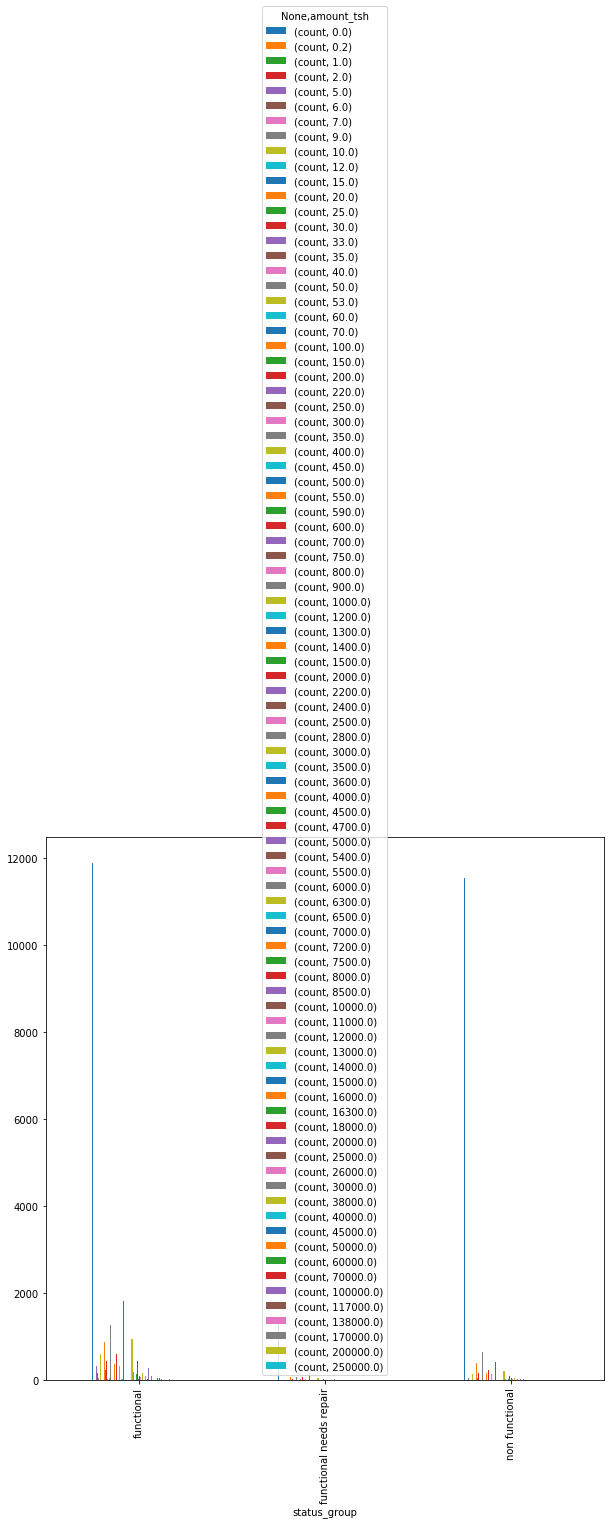

In [172]:
targets = df[['amount_tsh','status_group']]
targets['count'] = 1

targets = targets.groupby(['status_group','amount_tsh'],as_index=True).count()
targets.unstack().plot(kind='bar',figsize=(10,10))

---

## Features

### Water

#### Feature: Tsh Value

In [173]:
mybins = range(0, df.age.max(), 10)
df['age_bucket'] = pd.cut(df.age, bins=mybins)
df['age_bucket'].value_counts()

# df_age = df.groupby(['age_bucket'],axis=0).median()
# df_age = df_age.reset_index()
# df_age.age_bucket = df_age.age_bucket.astype('str')

df

,id,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,...,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class,waterpoint_type,age,age_bucket
0,69572,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,...,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,21,"(20, 30]"
2,34310,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,...,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,11,"(10, 20]"
3,67743,non functional,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,...,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,34,"(30, 40]"
5,9944,functional,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,...,submersible,vwc,per bucket,salty,enough,other,unknown,communal standpipe multiple,11,"(10, 20]"
6,19816,non functional,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Internal,Shinyanga,...,handpump,vwc,never pay,soft,enough,machine dbh,groundwater,hand pump,23,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,non functional,500.0,World Bank,351,ML appro,37.634053,-6.124830,Wami / Ruvu,Morogoro,...,submersible,vwc,monthly,soft,enough,machine dbh,groundwater,communal standpipe,13,"(10, 20]"
59395,60739,functional,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,...,gravity,water board,per bucket,soft,enough,spring,groundwater,communal standpipe,21,"(20, 30]"
59396,27263,functional,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,...,gravity,vwc,annually,soft,enough,river,surface,communal standpipe,24,"(20, 30]"
59398,31282,functional,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,...,handpump,vwc,never pay,soft,insufficient,shallow well,groundwater,hand pump,23,"(20, 30]"


In [ ]:
df_age.age_bucket.iloc[0] = 10
df_age.age_bucket.iloc[1] = 20
df_age.age_bucket.iloc[2] = 30
df_age.age_bucket.iloc[3] = 40
df_age.age_bucket.iloc[4] = 50
df_age.age_bucket.iloc[5] = 60
df_age.age_bucket.iloc[6] = 70
df_age.age_bucket.iloc[7] = 80
df_age.age_bucket.iloc[8] = 90
df_age.age_bucket.iloc[9] = 100
df_age.age_bucket.iloc[10] = 110

In [174]:
df.amount_tsh.sort_values().value_counts()

0.0        24889
500.0       2430
50.0        2002
20.0        1355
1000.0      1223
           ...  
60000.0        1
900.0          1
6300.0         1
8500.0         1
12.0           1
Name: amount_tsh, Length: 90, dtype: int64

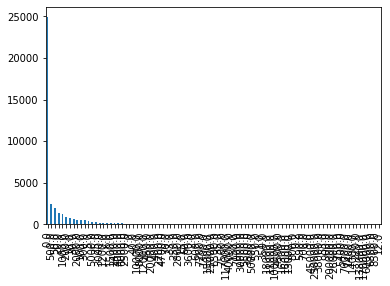

In [175]:
df.amount_tsh.value_counts().plot(kind='bar')

#### Feature: Quality

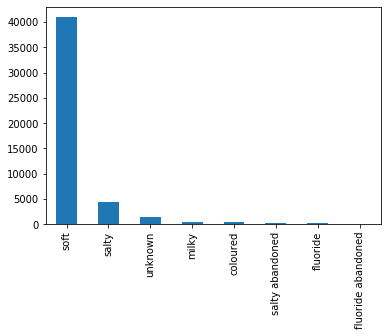

In [42]:
df.water_quality.value_counts().plot(kind='bar')

#### Feature: Quantity

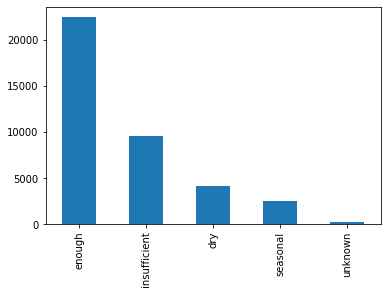

In [176]:
df.quantity.value_counts().plot(kind='bar')

#### Feature: Source

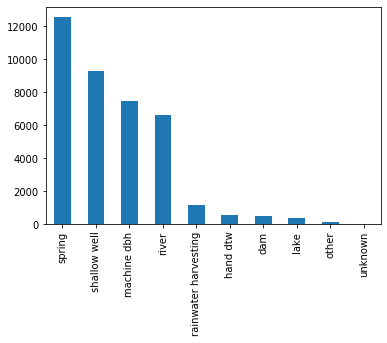

In [177]:
df.source.value_counts().plot(kind='bar')

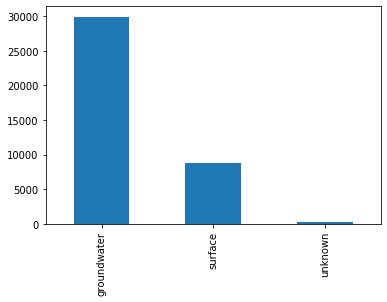

In [178]:
df.source_class.value_counts().plot(kind='bar')

#### Feature: Basin

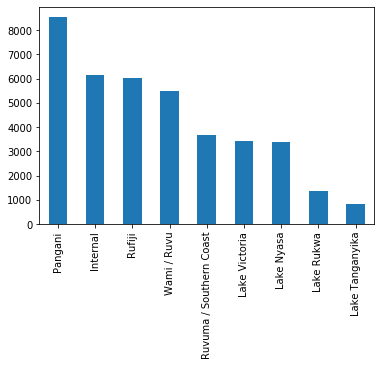

In [179]:
df.basin.value_counts().plot(kind='bar')

### Waterpoint

#### Feature: Waterpoint Age

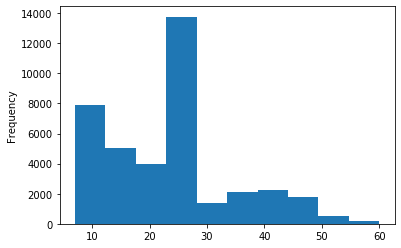

In [180]:
df.age.plot(kind='hist') #knn? 

In [181]:
##df[df.age == 22describe()

#### Feature: Waterpoint Type

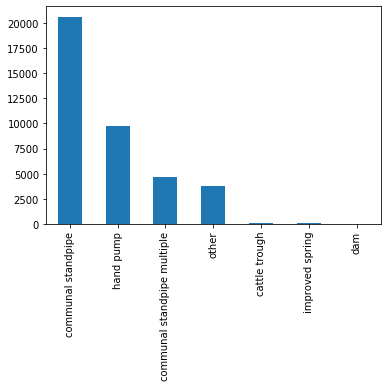

In [182]:
df.waterpoint_type.value_counts().plot(kind='bar')

#### Extraction Type

In [183]:
df.extraction_type_group.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'extraction_type_group'

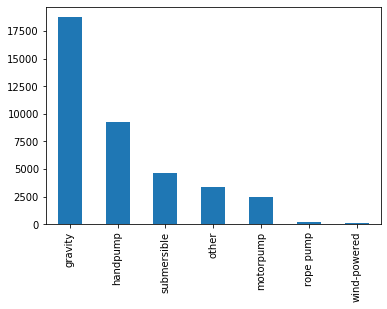

In [184]:
df.extraction_type_class.value_counts().plot(kind='bar')

In [185]:
df.extraction_type.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'extraction_type'

### Governance

#### Feature: Permit

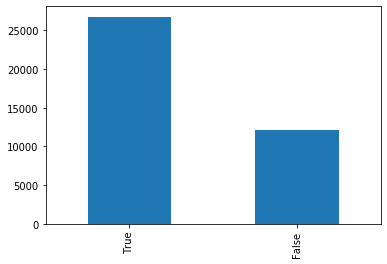

In [186]:
df.permit.value_counts().plot(kind='bar')

#### Feature: Public Meeting

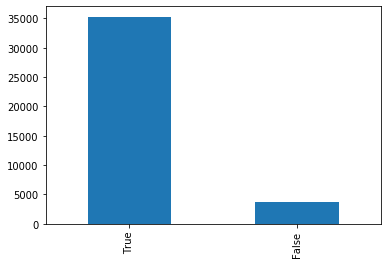

In [187]:
df.public_meeting.value_counts().plot(kind='bar')

#### Feature: Mangagement

### Feature: Funder

gpsheaight; a mountain? outlier?
longitude, are there errors? shouldnt be so far from the rest
construction year issues


In [190]:
prob = df.funder.value_counts()

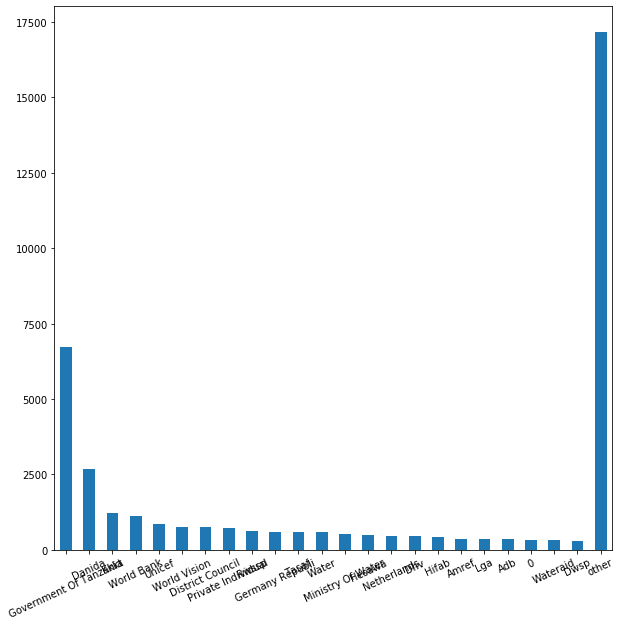

In [191]:
threshold = 300
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=25)
plt.show()
#rotate labels

#### Feature: Installer

In [192]:
installer = df.installer.value_counts()

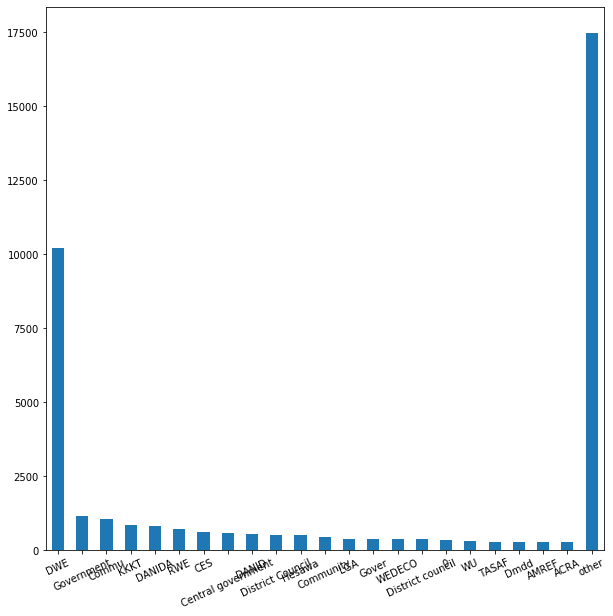

In [193]:
threshold = 250
mask = installer > threshold
tail_prob = installer.loc[~mask].sum()
installer = installer.loc[mask]
installer['other'] = tail_prob
installer.plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=25)
plt.show()
#rotate labels

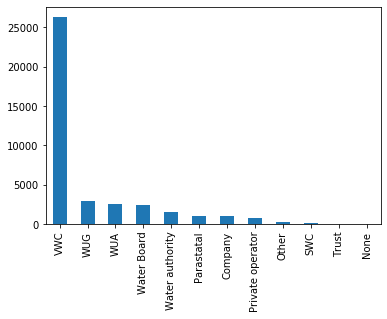

In [194]:
df.scheme_management.value_counts().plot(kind='bar')

In [195]:
# from statsmodels.graphics.mosaicplot import mosaic
# plt.rcParams['font.size'] = 6.0
# mosaic(df, ['water_quality','status_group']) 

---
---
---

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


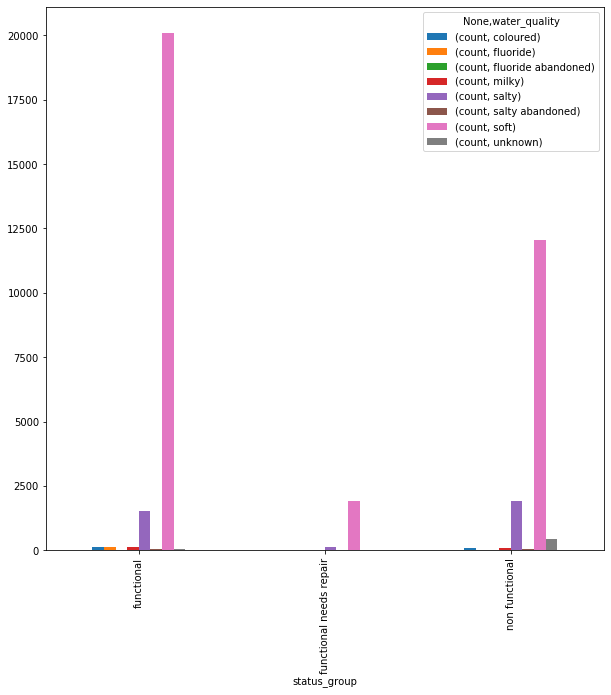

In [215]:
waterqual = df[['status_group','water_quality']]
waterqual['count'] = 1
waterqual = waterqual.groupby(['status_group','water_quality'],as_index=True).count()
waterqual
waterqual.unstack().plot(kind='bar',figsize=(10,10))

In [197]:
df[['management','status_group']]
df.water_quality.value_counts().index.tolist()

['soft',
 'salty',
 'unknown',
 'coloured',
 'milky',
 'fluoride',
 'salty abandoned',
 'fluoride abandoned']

---

In [200]:
split1 = df[['management','status_group']]
split1['count'] = 1
split1

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,management,status_group,count
0,vwc,functional,1
2,vwc,functional,1
3,vwc,non functional,1
5,vwc,functional,1
6,vwc,non functional,1
...,...,...,...
59394,vwc,non functional,1
59395,water board,functional,1
59396,vwc,functional,1
59398,vwc,functional,1


In [202]:
split11 = split1.groupby(['status_group','management'],as_index=True).count()
split11

count
status_group            management             
functional              company             233
                        other               159
                        other - school       23
                        parastatal          656
                        private operator   1003
                        trust                35
                        unknown              27
                        vwc               14035
                        water authority     311
                        water board        1638
                        wua                1552
                        wug                2450
functional needs repair company              12
                        other                20
                        other - school        1
                        parastatal          109
                        private operator     35
                        trust                 4
                        unknown               4
                        vwc                1450
                        water authority      30
                        water board          52
                        wua                 144
                        wug                 237
non functional          company             399
                        other               104
                        other - school       75
                        parastatal          345
                        private operator    376
                        trust                18
                        unknown              27
                        vwc               11337
                        water authority     149
                        water board         261
                        wua                 478
                        wug                1093

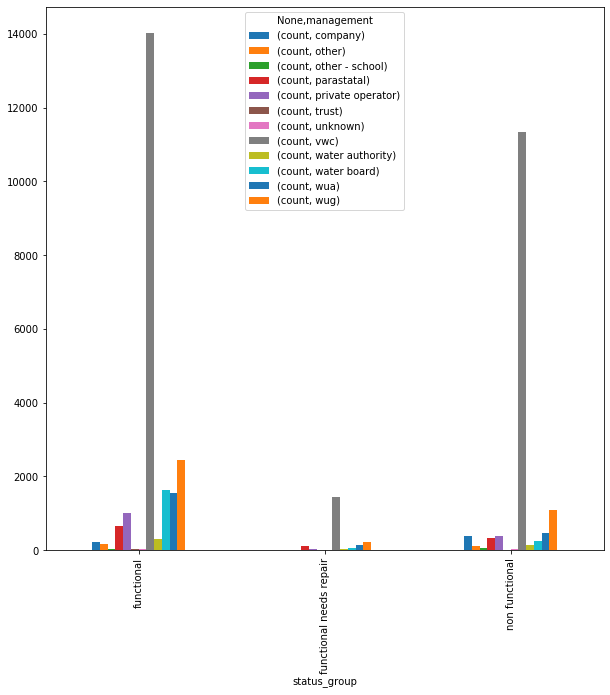

In [203]:
split11.unstack().plot(kind='bar',figsize=(10,10))

In [204]:
split12 = split1.groupby(['management','status_group'],as_index=True).count()
split12

count
management       status_group                  
company          functional                 233
                 functional needs repair     12
                 non functional             399
other            functional                 159
                 functional needs repair     20
                 non functional             104
other - school   functional                  23
                 functional needs repair      1
                 non functional              75
parastatal       functional                 656
                 functional needs repair    109
                 non functional             345
private operator functional                1003
                 functional needs repair     35
                 non functional             376
trust            functional                  35
                 functional needs repair      4
                 non functional              18
unknown          functional                  27
                 functional needs repair      4
                 non functional              27
vwc              functional               14035
                 functional needs repair   1450
                 non functional           11337
water authority  functional                 311
                 functional needs repair     30
                 non functional             149
water board      functional                1638
                 functional needs repair     52
                 non functional             261
wua              functional                1552
                 functional needs repair    144
                 non functional             478
wug              functional                2450
                 functional needs repair    237
                 non functional            1093

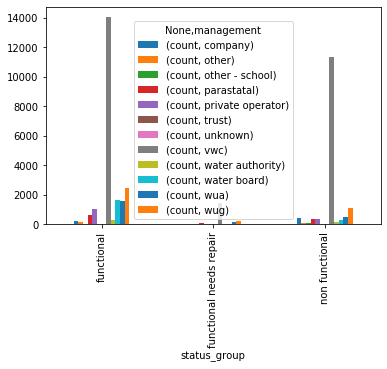

In [205]:
split11.unstack().plot(kind='bar')

In [206]:
split2 = df[['installer','status_group']]
split2['count'] = 1

split13 = split2.groupby(['status_group','installer'],as_index=True).count()
split13

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count
status_group   installer         
functional     -                1
               0              138
               ABASIA          23
               ABD              1
               AC               2
...                           ...
non functional wanan            3
               wananchi        17
               water board      2
               world            3
               world banks      1

[2235 rows x 1 columns]

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


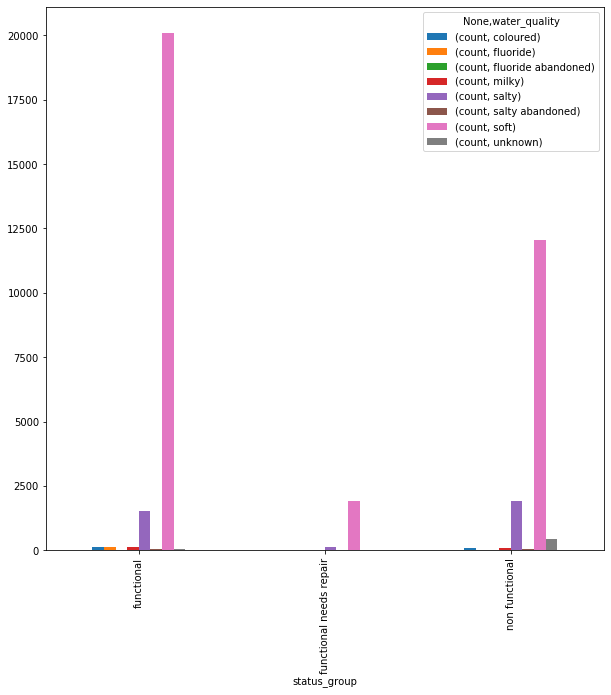

In [207]:
waterfeatures = df[['water_quality','status_group']]
waterfeatures['count'] = 1

waterfeatures = waterfeatures.groupby(['status_group','water_quality'],as_index=True).count()
waterfeatures.unstack().plot(kind='bar',figsize=(10,10))

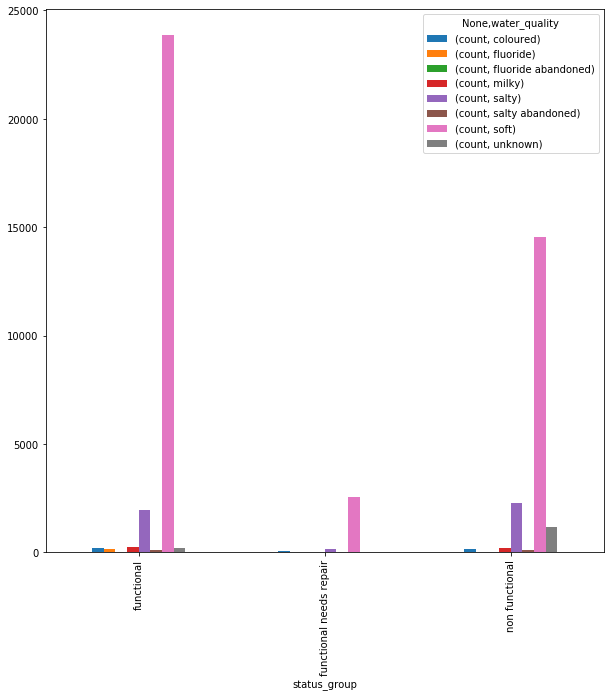

In [141]:
waterfeatures.unstack().plot(kind='bar',figsize=(10,10))